----------------------------------

# Visão Geral

- Exercícios: 15 min 

### Requisitos:
- Conhecidos básicos da linguagem Python
- Leitura da lição de noções básicas de imagens digitais
- Leitura da lição de Transformações de imagens digitais e Operações aritméticas em imagens digitais
- Leitura da lição de Histogramas

---------------------------

# Questões
--- 

### 1. Observando o histograma abaixo, é notavél que há um grande número de pixels escuros na imagem vela.jpg, conforme indicado pelo gráfico e pode ser visualizado na imagem. No entanto, precisamos analisar os pixels presentes na vela. Faça um algoritmo que calcule o histograma dos pixels presentes na vela. Dica: use uma máscara para separar os pixels da vela.

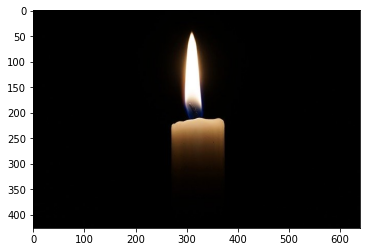

In [1]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

# abrindo a imagem
imagem = cv2.imread('../../figures/vela.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# mostrando a imagem em tons de cinza
plt.imshow(imagem)

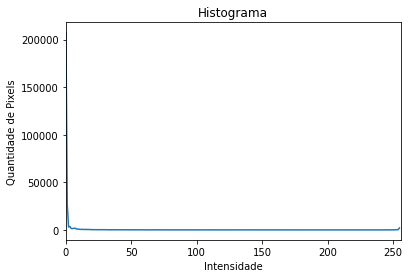

In [2]:
# criando o histograma da imagem em tons de cinza
h = cv2.calcHist([imagem], [0], None, [256], [0, 256])

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

### Visualizando e verificando o tamanho da máscara

In [3]:
# criando uma mascara para vela
# para auxiliar na descoberta das coordenas pode ser usar um programa de edição de imagens
mascara = np.full(imagem.shape[:2], 0, dtype=np.uint8)
mascara[40:350, 275:375] = 255

In [4]:
# aplicando a operação and entre a imagem da vela e a mascara
imagem_mascara = cv2.bitwise_and(imagem, imagem, mask=mascara)

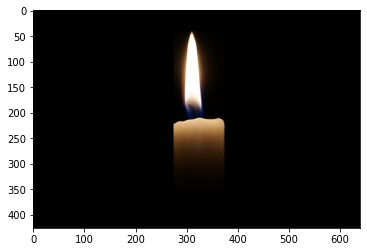

In [5]:
# mostrando a imagem resultante
plt.imshow(imagem_mascara)

### Gerando o histograma sobre a máscara

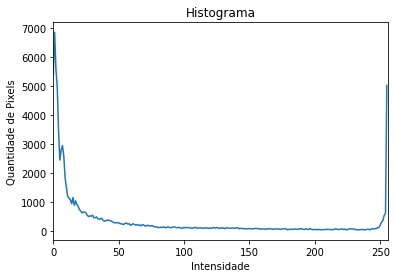

In [6]:
# criando a mascara booleana 
mascara = np.full(imagem.shape[:2], 0, dtype="bool")
mascara[40:350, 275:375] = True

# criando o novo histograma
histogram, bin_edges = np.histogram(imagem[mascara], bins=256, range=(0, 256))

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()